In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pkdarabi_cardetection_path_origin = kagglehub.dataset_download('pkdarabi/cardetection')

100%|██████████| 99.8M/99.8M [00:01<00:00, 96.9MB/s]

Extracting files...


In [2]:
pkdarabi_cardetection_path = pkdarabi_cardetection_path_origin + "/car"

# YOLO

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 20.4 MB/s eta 0:00:00


In [4]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


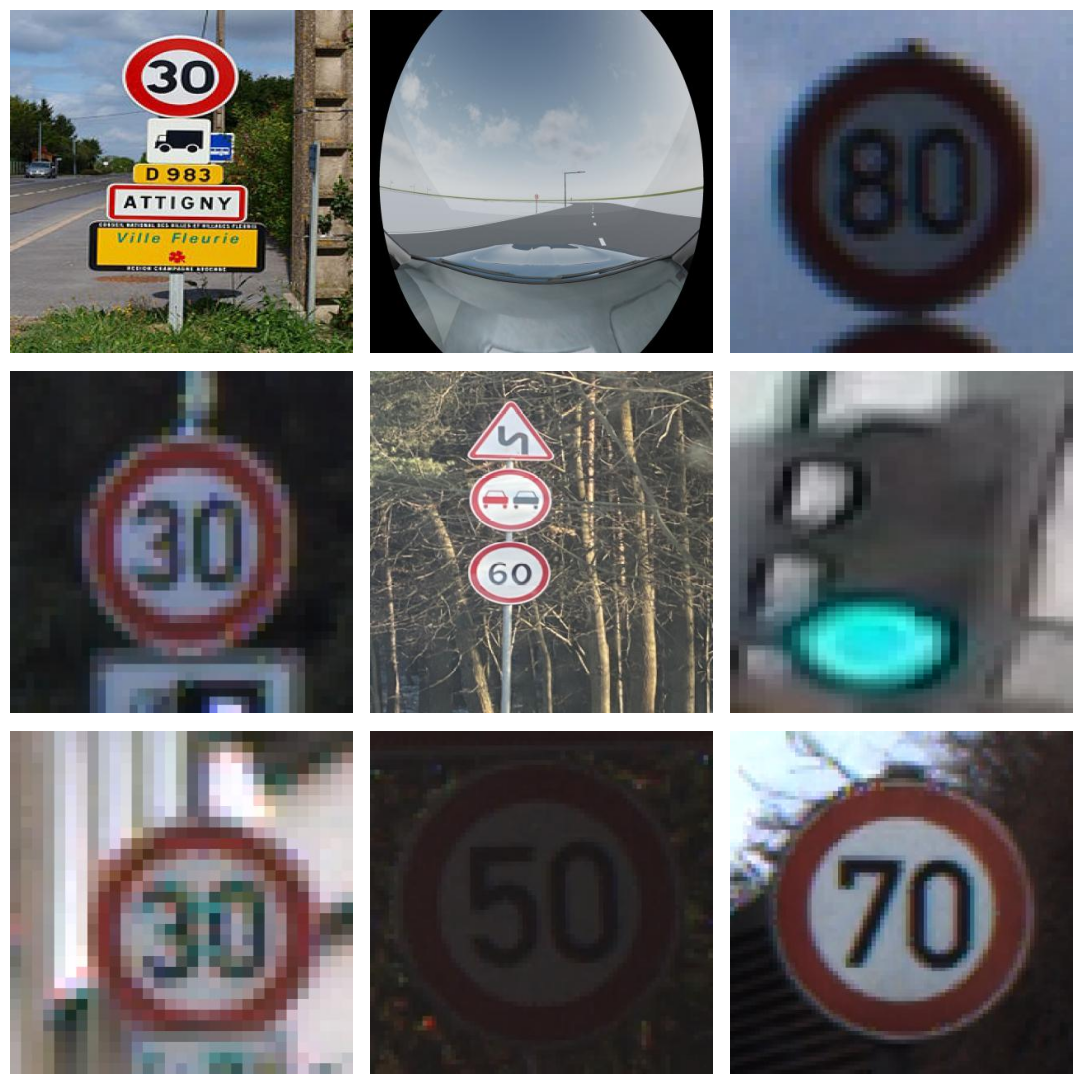

In [5]:
Image_dir = pkdarabi_cardetection_path + "/train/images"

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

final_model = YOLO('yolov8n.pt')
results = final_model.train(data=pkdarabi_cardetection_path + "/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.5MB/s]


Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/.cache/kagglehub/datasets/pkdarabi/cardetection/versions/5/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

100%|██████████| 755k/755k [00:00<00:00, 18.8MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/cardetection/versions/5/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:02<00:00, 1585.44it/s]


train: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/cardetection/versions/5/car/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.281         61.45         376.6        (1, 3, 640, 640)                    list
     3013773       16.42         0.409         36.47         55.35        (2, 3, 640, 640)                    list
     3013773       32.84         0.682         26.95         53.98        (4, 3, 640, 640)                    list
     3013773       65.67         1.1

train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/cardetection/versions/5/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/cardetection/versions/5/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 618.47it/s]


val: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/cardetection/versions/5/car/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0008828125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30        15G      0.933      3.975       1.25         62        640: 100%|██████████| 32/32 [01:11<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]

                   all        801        944     0.0556      0.688     0.0839     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      14.9G     0.7287      2.848      1.092         61        640: 100%|██████████| 32/32 [01:06<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.16s/it]

                   all        801        944      0.689     0.0783      0.202      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.9G     0.7304      2.364      1.066         57        640: 100%|██████████| 32/32 [01:04<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.37s/it]

                   all        801        944       0.37      0.404      0.361      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30        15G     0.6905      2.185      1.052        227        640:  16%|█▌        | 5/32 [00:07<00:29,  1.09s/it]

In [ ]:
final_model.export(format='onnx')

In [ ]:
trained_model = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
import locale
print(locale.getpreferredencoding())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
def compute_iou(bb1, bb2):
  bb1_x1=bb1[0]
  bb1_y1=bb1[1]
  bb1_x2=bb1[2]
  bb1_y2=bb1[3]

  bb2_x1=bb2[0]
  bb2_y1=bb2[1]
  bb2_x2=bb2[2]
  bb2_y2=bb2[3]

  x_left = max(bb1_x1, bb2_x1)
  y_top = max(bb1_y1, bb2_y1)
  x_right = min(bb1_x2, bb2_x2)
  y_bottom = min(bb1_y2, bb2_y2)

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection_area = (x_right - x_left) * (y_bottom - y_top)

  bb1_area = (bb1_x2 - bb1_x1) * (bb1_y2 - bb1_y1)
  bb2_area = (bb2_x2 - bb2_x1) * (bb2_y2 - bb2_y1)

  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
  assert iou >= 0.0
  assert iou <= 1.0
  return iou

In [ ]:
class IOUTracker:
    def __init__(self, iou_threshold=0.5):
        self.iou_threshold = iou_threshold
        self.tracked_objects = {}  # Object ID -> Bounding Box
        self.next_object_id = 0

    def update(self, detections):
        """
        Update tracked objects based on new detections.
        detections: List of bounding boxes [[x1, y1, x2, y2], ...].
        """
        updated_tracked_objects = {}
        assigned_detections = set()
        # Match existing tracked objects to new detections
        for obj_id, prev_bbox in self.tracked_objects.items():
            best_iou = 0
            best_det_idx = -1

            for idx, det_bbox in enumerate(detections):
                if idx in assigned_detections:
                    continue
                iou = compute_iou(prev_bbox, det_bbox)
                if iou > best_iou and iou >= self.iou_threshold:
                    best_iou = iou
                    best_det_idx = idx

            if best_det_idx != -1:
                updated_tracked_objects[obj_id] = detections[best_det_idx]
                assigned_detections.add(best_det_idx)

        # Add new detections as new objects
        for idx, det_bbox in enumerate(detections):
            if idx not in assigned_detections:
                updated_tracked_objects[self.next_object_id] = det_bbox
                self.next_object_id += 1

        self.tracked_objects = updated_tracked_objects
        return self.tracked_objects


In [ ]:
# Open video file
input_video_path = pkdarabi_cardetection_path_origin + '/video.mp4'
output_video_path = 'output_video.mp4'
cap = cv2.VideoCapture(input_video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set up video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
tracker = IOUTracker(iou_threshold=0.5)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform YOLO inference
    results = trained_model(frame, verbose=False)
    detections = results[0].boxes.data.cpu().numpy()  # [x1, y1, x2, y2, conf, class]
    # Extract bounding boxes from detections
    bbox_list = []
    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        bbox_list.append([x1, y1, x2, y2])

    # Update tracker
    tracked_objects = tracker.update(bbox_list)

    # Draw tracked objects
    for obj_id, bbox in tracked_objects.items():
        x1, y1, x2, y2 = map(int, bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {trained_model.names[cls]}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Save the processed frame
    out.write(frame)

cap.release()
out.release()


In [ ]:
from IPython.display import HTML
from base64 import b64encode

In [ ]:

video_file=output_video_path

mp4 = open(video_file,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(""" <video controls><source src="%s" type="video/mp4"></video>""" % data_url)